<a href="https://colab.research.google.com/github/Aastha12001/Sparks2022/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('globalterrorismdb_0718dist.csv' , encoding='latin1')

In [ ]:
df.columns.values #get all the column values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
df.rename({'iyear':'Year','imonth':'Month','iday':'day','gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},axis=1, inplace=True) #rename few columns
df.head() #get first five rows of the dataset

,eventid,Year,Month,day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill', 'Wound','target1',
         'summary','Group','Targettype','Weapon','motive']] #extracting few columns

In [ ]:
df.shape #tuple of shape of data frame

(9656, 18)

In [ ]:
df.isnull().sum() #check for null values

Year             0
Month            0
day              0
Country          1
State           39
Region           1
City             1
latitude       303
longitude      303
Attacktype       1
kill          1159
Wound         2442
target1         74
summary       8791
Group            1
Targettype       1
Weapon           1
motive        9055
dtype: int64

In [ ]:
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)
df['Casualities'] = df['kill'] + df['Wound']

In [ ]:
df.info() #information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         9656 non-null   int64  
 1   Month        9656 non-null   int64  
 2   day          9656 non-null   int64  
 3   Country      9655 non-null   object 
 4   State        9617 non-null   object 
 5   Region       9655 non-null   object 
 6   City         9655 non-null   object 
 7   latitude     9353 non-null   float64
 8   longitude    9353 non-null   float64
 9   Attacktype   9655 non-null   object 
 10  kill         9656 non-null   float64
 11  Wound        9656 non-null   float64
 12  target1      9582 non-null   object 
 13  summary      865 non-null    object 
 14  Group        9655 non-null   object 
 15  Targettype   9655 non-null   object 
 16  Weapon       9655 non-null   object 
 17  motive       601 non-null    object 
 18  Casualities  9656 non-null   float64
dtypes: flo

In [ ]:
df.describe() #description of the data

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,9656.000000,9656.000000,9656.000000,9353.000000,9353.000000,9656.000000,9656.000000,9656.000000
mean,1975.971935,6.282001,15.164561,33.155350,-20.829568,0.717585,0.811205,1.528790
std,2.890571,3.368098,9.022129,22.172133,53.255134,5.399032,6.241496,8.798474
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000,0.000000
25%,1974.000000,3.000000,7.000000,25.699073,-73.931351,0.000000,0.000000,0.000000
50%,1977.000000,6.000000,15.000000,40.697132,-5.956210,0.000000,0.000000,0.000000
75%,1978.000000,9.000000,23.000000,46.669097,11.119059,1.000000,0.000000,1.000000
max,1979.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000,422.000000


**Data Visualization**

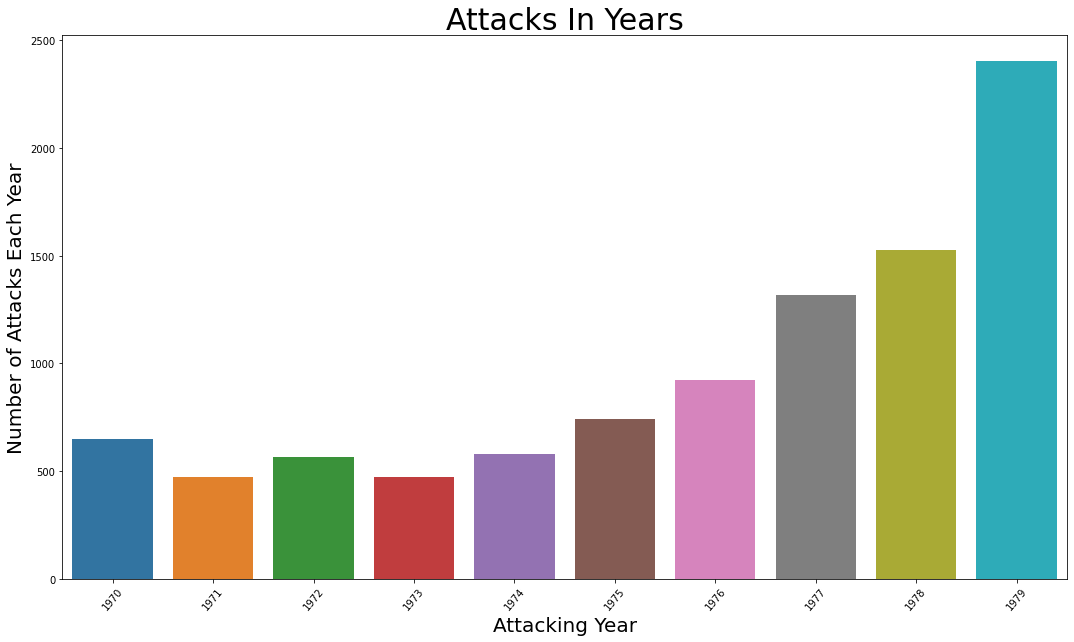

In [ ]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

Maximum attacks were in the year 1979.

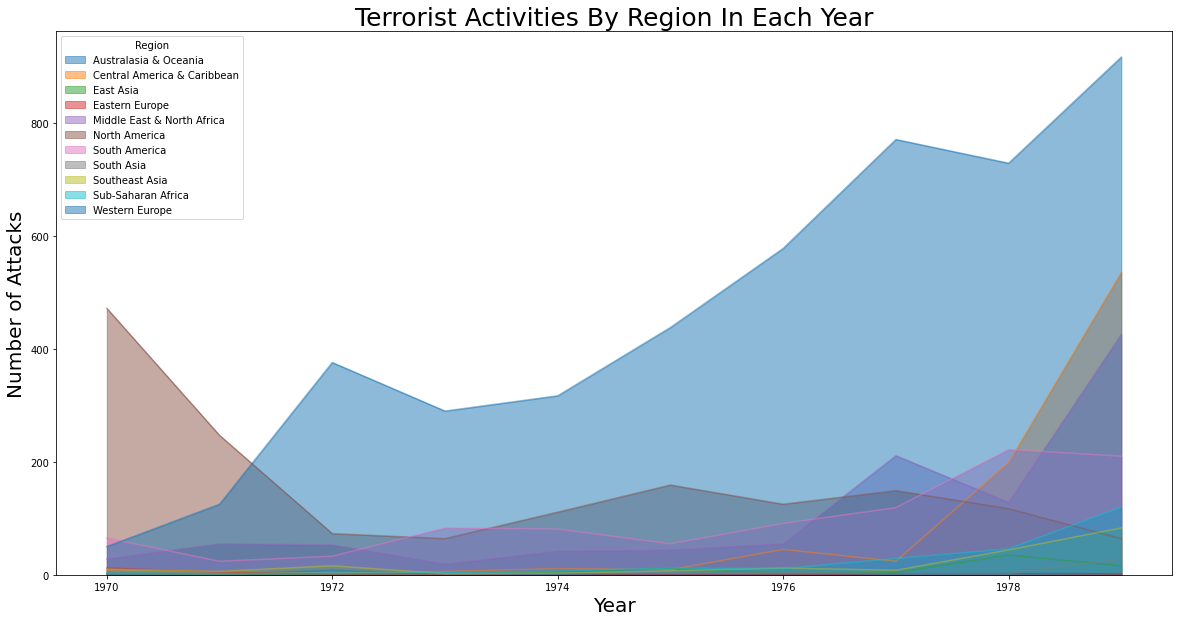

In [ ]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

Most attacks were in the region of Australasia and Oceania.

In [ ]:
attack = df.Country.value_counts()[:10]
print(attack)

United Kingdom    1599
United States     1460
Italy              992
Spain              890
Turkey             475
France             464
Colombia           404
El Salvador        387
Argentina          326
Nicaragua          286
Name: Country, dtype: int64


In [ ]:
df.Group.value_counts()[1:10]

Irish Republican Army (IRA)                    983
Basque Fatherland and Freedom (ETA)            424
Protestant extremists                          197
Sandinista National Liberation Front (FSLN)    197
Ulster Volunteer Force (UVF)                   170
Left-Wing Militants                            169
Palestinians                                   149
Corsican National Liberation Front (FLNC)      149
Red Brigades                                   142
Name: Group, dtype: int64

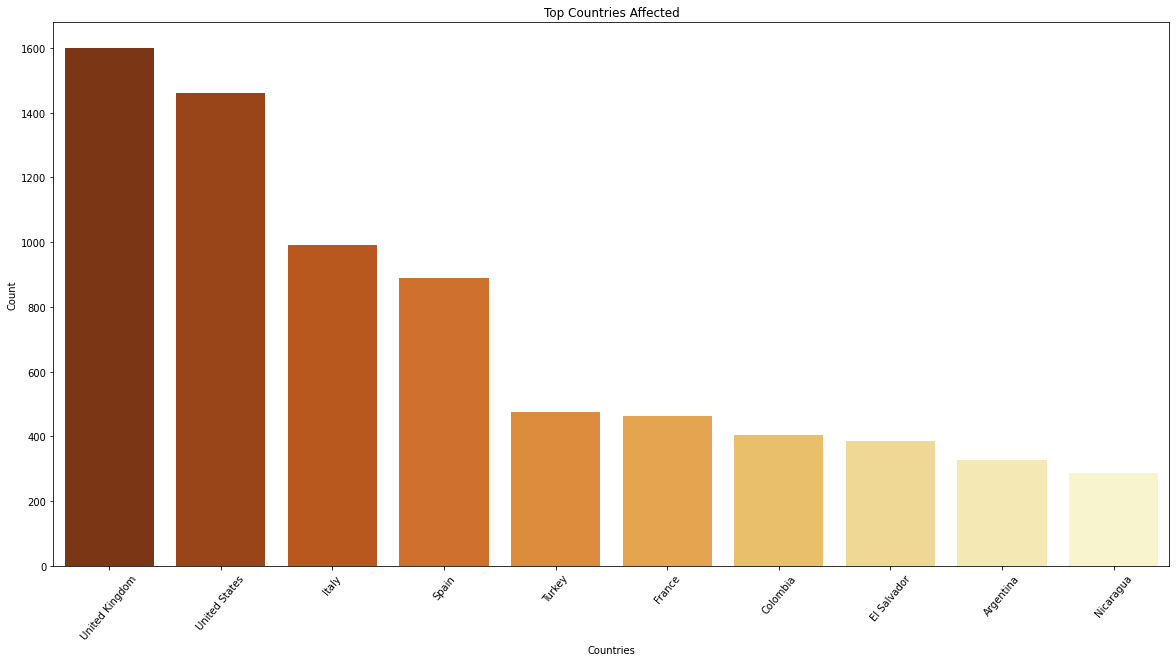

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

United Kingdom is the most affected by the attacks.

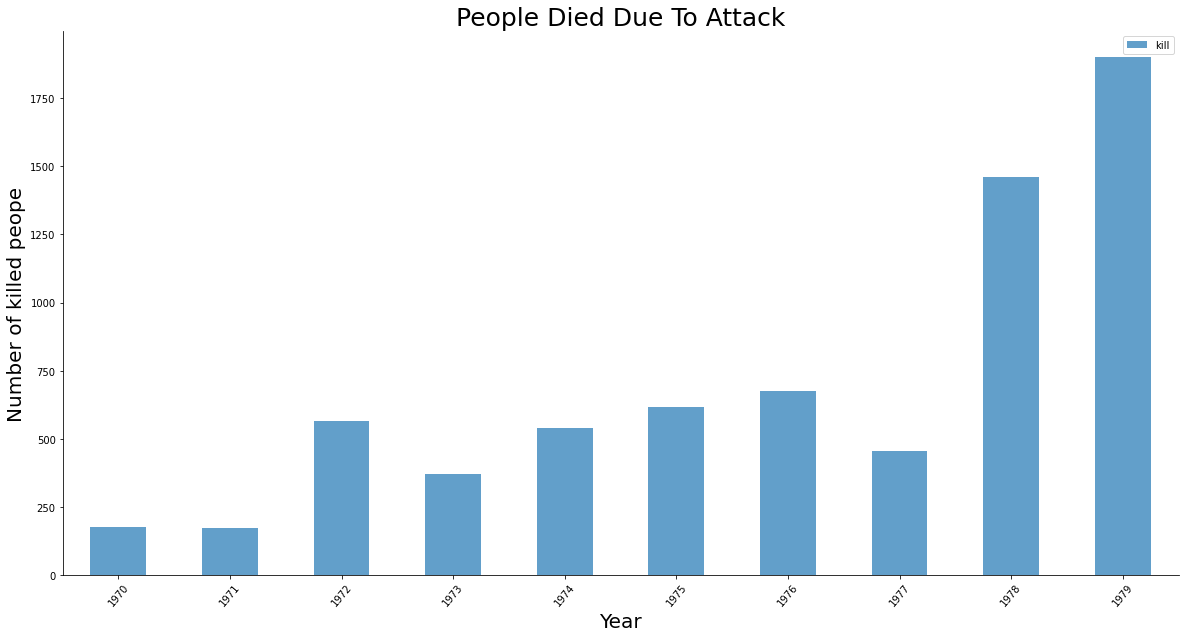

In [ ]:
df1 = df[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df1.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

In 1979, maximum people died in attacks.

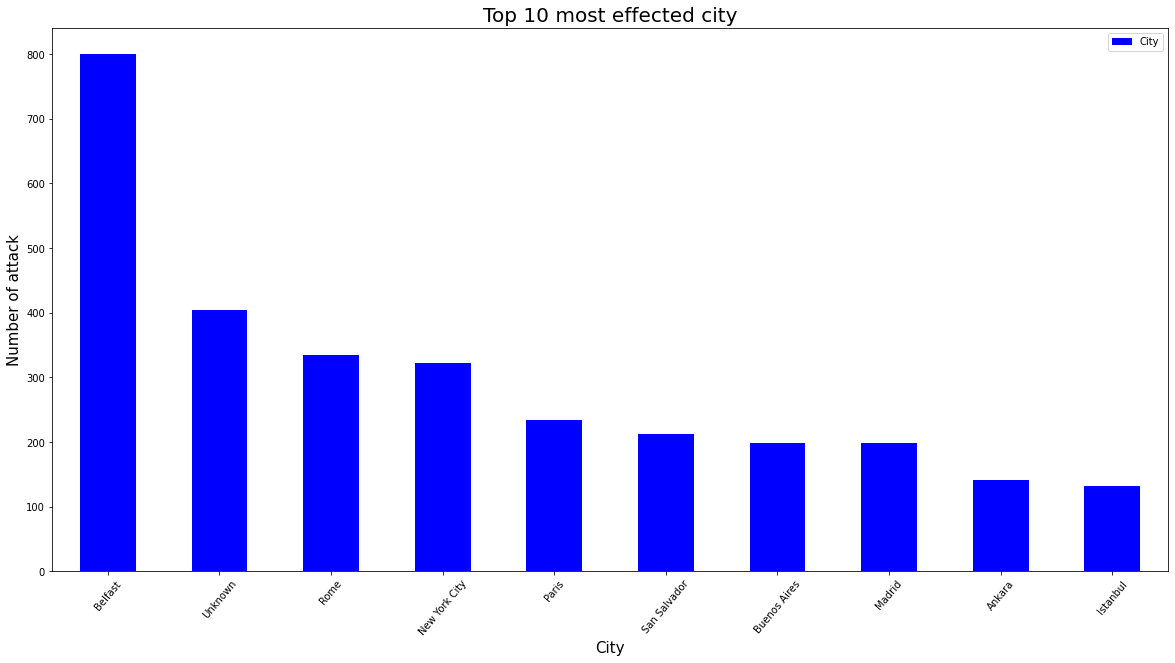

In [ ]:
df['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

Belfast is the most affected city by the attacks.

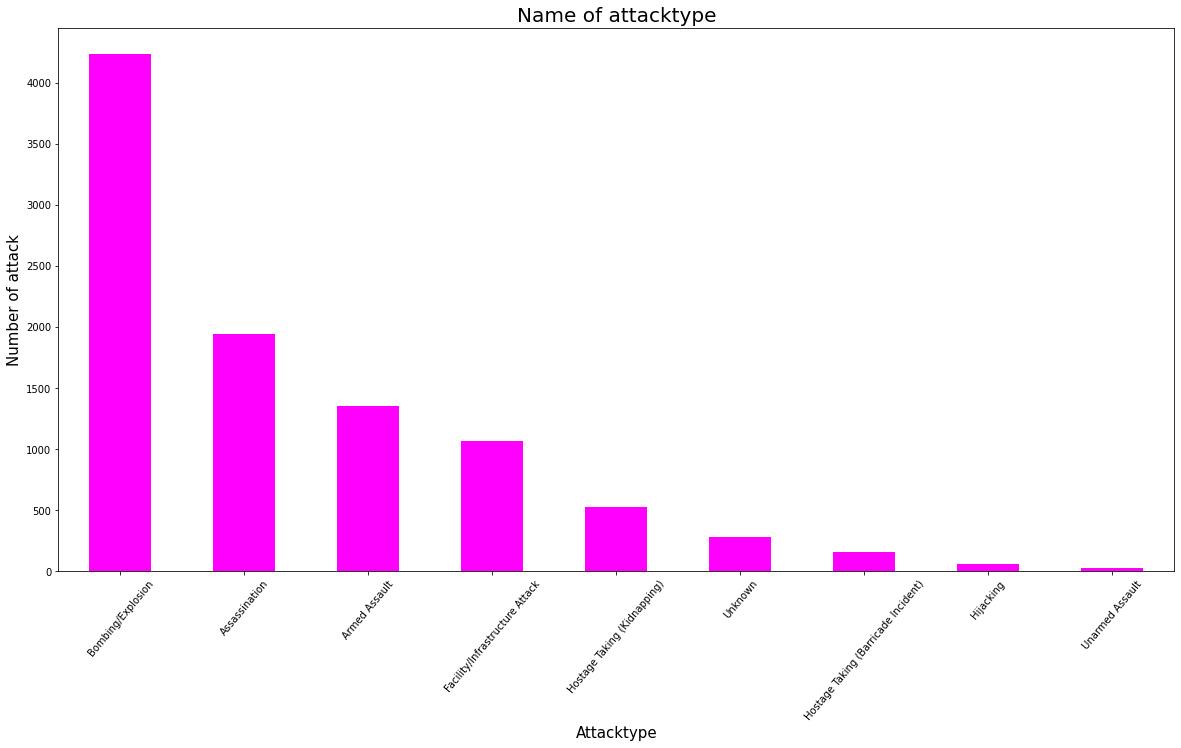

In [ ]:
df['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='magenta')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

Bombing/ Explosion is the most common atck type. 

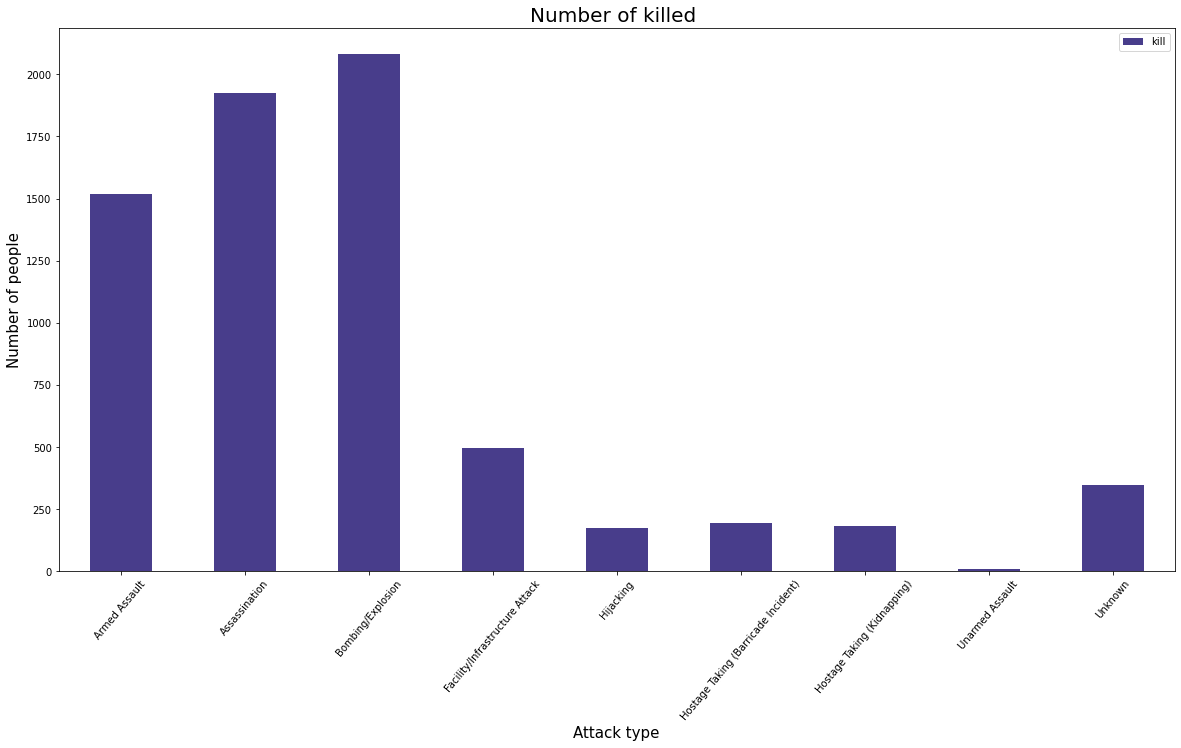

In [ ]:
df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

Maximum people were killed by bombing/explosion

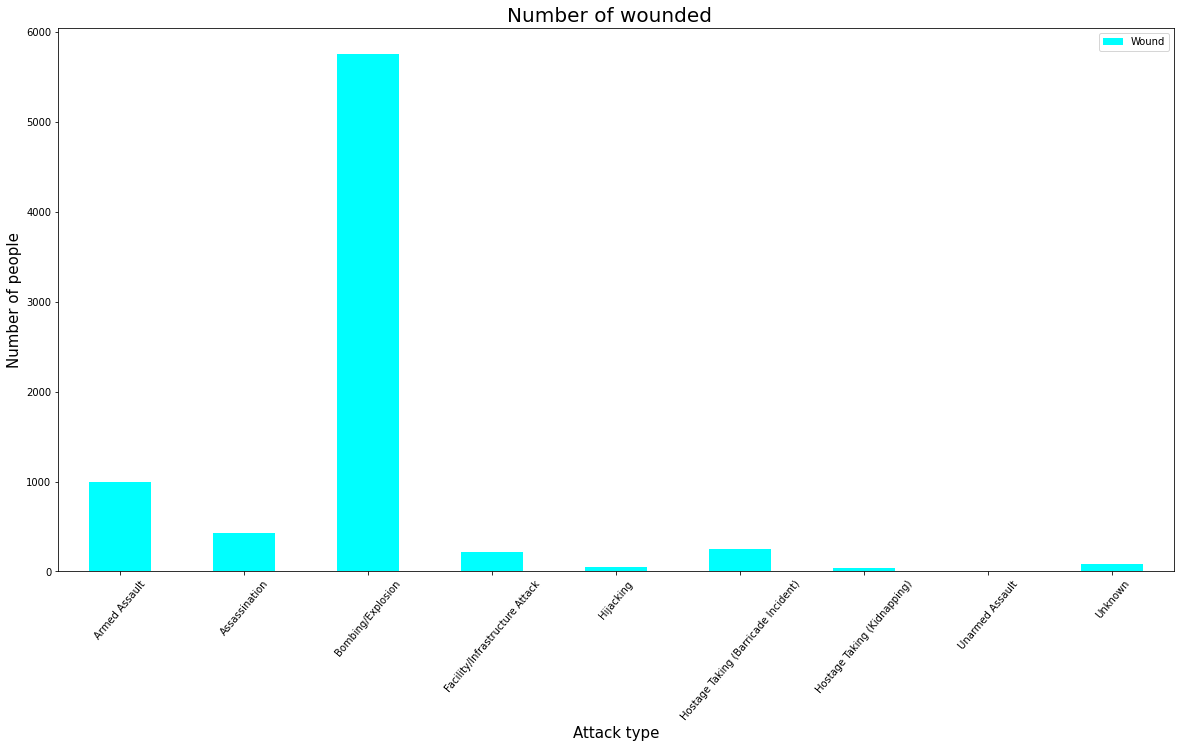

In [ ]:
df[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['cyan'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

Maximum people were wounded by bombing/explosion



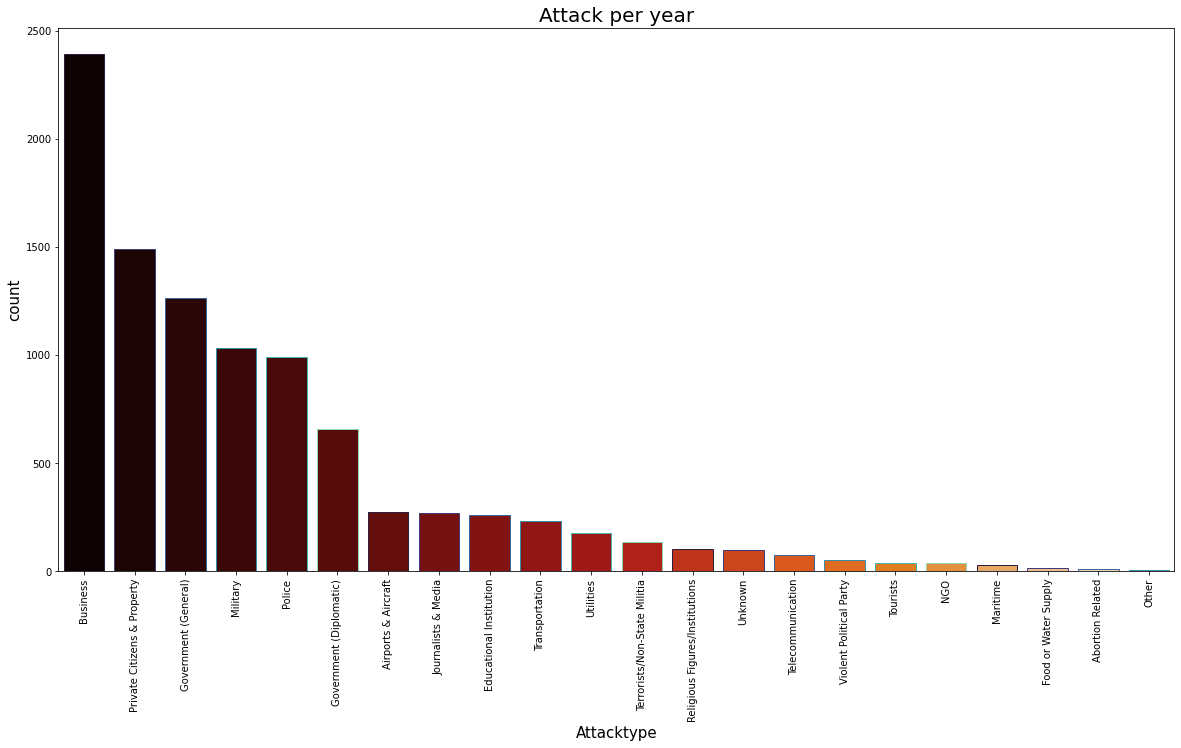

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(df["Targettype"],order=df['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

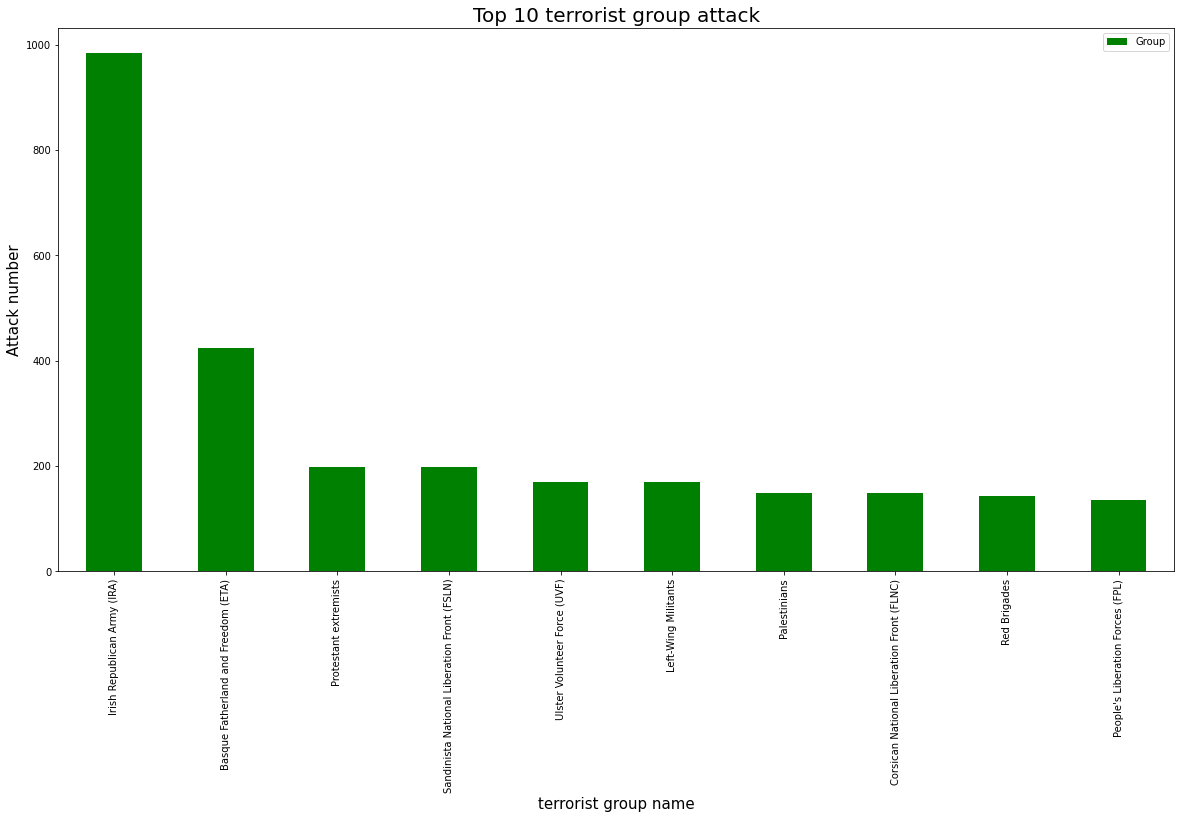

In [ ]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

The maximum attacks were by the group 'Irish Republic Army'. 

In [ ]:
df1=df[['Group','Country','kill']]
df2=df1.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)

In [ ]:
kill = df.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 6929


In [ ]:
typeKill = df.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
print(typeKill)

Attacktype  Armed Assault  Assassination  Bombing/Explosion  \
kill               1519.0         1923.0             2083.0   

Attacktype  Facility/Infrastructure Attack  Hijacking  \
kill                                 495.0      175.0   

Attacktype  Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  \
kill                                      196.0                        181.0   

Attacktype  Unarmed Assault  Unknown  
kill                   11.0    346.0  


The most common attack type is bombing/ explosion.

In [ ]:
countryKill = df.pivot_table(columns='Country', values='kill', aggfunc='sum')
print(countryKill)

Country  Afghanistan  Algeria  Andorra  Angola  Argentina  Australia  Austria  \
kill            53.0      0.0      0.0    19.0      328.0        3.0      9.0   

Country  Bahamas  Bangladesh  Barbados  ...  United Kingdom  United States  \
kill         0.0         0.0      73.0  ...          1746.0          179.0   

Country  Uruguay  Venezuela  West Bank and Gaza Strip  West Germany (FRG)  \
kill         4.0        2.0                      11.0                44.0   

Country  Western Sahara  Yugoslavia  Zaire  Zambia  
kill                0.0         2.0    1.0     5.0  

[1 rows x 108 columns]


The maximum people were killed in United Kingdom.

**Thank You**